# Breast Cancer Diagnosis Using Neural Networks
This notebook implements a basic Artificial Neural Network (ANN) to predict breast cancer diagnosis (Malignant or Benign) based on 30 features extracted from fine needle aspirate (FNA) images of breast masses.

## Steps Included:
- Data preprocessing: Loading and preparing the dataset.
- ANN Implementation from Scratch:
  - Forward Propagation
  - Backward Propagation
- Training the model and visualizing training loss.
- Evaluating the model's accuracy.

The dataset used is the Wisconsin Diagnostic Breast Cancer (WDBC) dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'wdbc.data'  # Ensure the dataset is in the same directory as this notebook
columns = [
    'ID', 'Diagnosis',
    'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness',
    'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 'Mean Symmetry',
    'Mean Fractal Dimension',
    'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE',
    'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE',
    'Fractal Dimension SE',
    'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
    'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry',
    'Worst Fractal Dimension'
]
data = pd.read_csv(file_path, header=None, names=columns)

# Drop the ID column
data.drop('ID', axis=1, inplace=True)

# Encode the target variable
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Normalize the features
X = data.drop('Diagnosis', axis=1).values
y = data['Diagnosis'].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Neural Network Implementation from Scratch
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]
        dZ2 = output - y.reshape(-1, 1)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    def train(self, X, y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))
            losses.append(loss)
            self.backward(X, y, output)
        return losses

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)


In [3]:
# Initialize and train the network
input_size = X_train.shape[1]
hidden_size = 16  # Number of neurons in the hidden layer
output_size = 1  # Binary classification
learning_rate = 0.01

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
epochs = 2000
losses = nn.train(X_train, y_train, epochs)

# Predict on the test set
y_pred = nn.predict(X_test)
accuracy = np.mean(y_pred.flatten() == y_test)
print(f"Test Set Accuracy: {accuracy * 100:.2f}%")


Test Set Accuracy: 62.28%


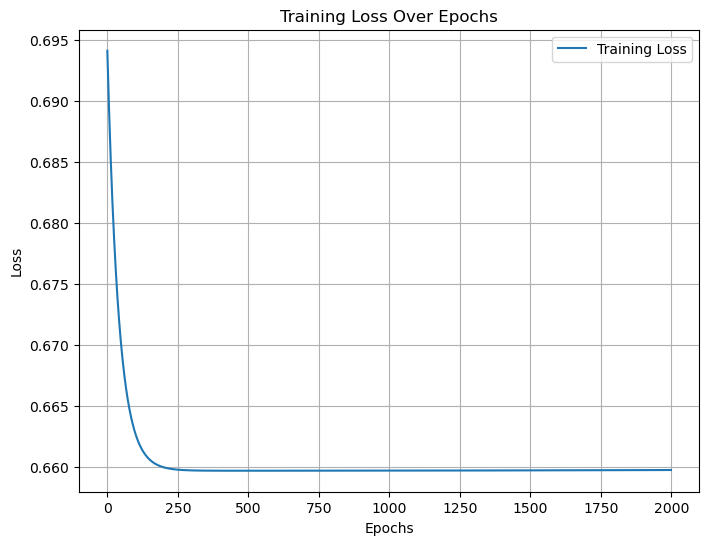

In [4]:
# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
